<a href="https://colab.research.google.com/github/conglapgit45/Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1A8kK0IEsT3w8htzU18ihFr5UV-euhquC

Downloading...
From: https://drive.google.com/uc?id=1A8kK0IEsT3w8htzU18ihFr5UV-euhquC
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 14.3MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# Read data
df = pd.read_csv('./SalesPrediction.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
# One-hot encoding for categorical
df = pd.get_dummies(df)
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


<Axes: >

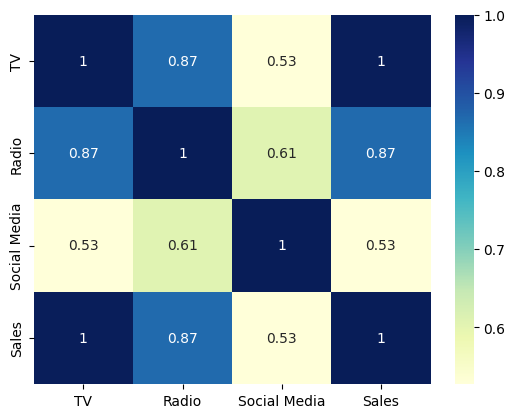

In [ ]:
# Fill value for nulls
df = df.fillna(df.mean())

# Visualize correlations
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

In [ ]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
y = df[['Sales']]

# Split data to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# scale data
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.fit_transform(X_test)

In [ ]:
print(scaler.mean_[0])

53.850231941683234


In [ ]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = self.X_data.shape[1]

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        if X_data.shape[1] == self.num_features:
            y_pred = X_data.dot(self.theta)
        else:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y - y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

In [ ]:
# Case 1
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
print(r2score(y_pred, y))

# Case 2
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
print(r2score(y_pred, y))

1.0
-2.235294117647059


In [ ]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features.transform(X_test_processed)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

-2.2119776223197106e+21